### **Exploratory Data Analysis (EDA) Notebook for NER & Image Classification**


# **1️⃣ Load Required Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from datasets import load_dataset
from torchvision import datasets, transforms
from PIL import Image
import random
import os

print("✅ Libraries Loaded Successfully!")  # Expected Output: Libraries Loaded Successfully!


✅ Libraries Loaded Successfully!


# **2️⃣ Load and Explore the NER Dataset**

In [5]:
# Load the NER dataset
ner_dataset = load_dataset("conll2003")

# Show dataset structure
print(ner_dataset)  # Expected Output: DatasetDict with train, validation, and test splits

# Display some example sentences
for i in range(5):
    print("Tokens:", ner_dataset["train"][i]["tokens"])
    print("NER Tags:", ner_dataset["train"][i]["ner_tags"])
    print("-" * 50)


DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})
Tokens: ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
NER Tags: [3, 0, 7, 0, 0, 0, 7, 0, 0]
--------------------------------------------------
Tokens: ['Peter', 'Blackburn']
NER Tags: [1, 2]
--------------------------------------------------
Tokens: ['BRUSSELS', '1996-08-22']
NER Tags: [5, 0]
--------------------------------------------------
Tokens: ['The', 'European', 'Commission', 'said', 'on', 'Thursday', 'it', 'disagreed', 'with', 'German', 'advice', 'to', 'consumers', 'to', 'shun', 'British', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow',

# **3️⃣ Visualize NER Labels Distribution**


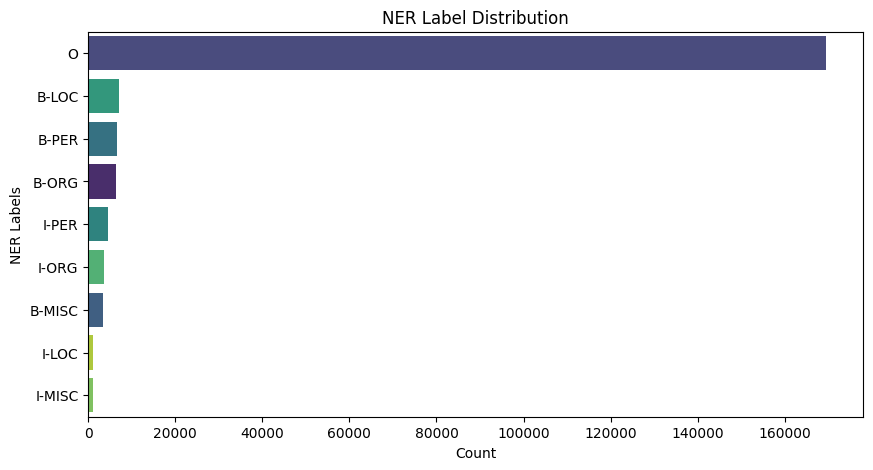

In [7]:
# Get label distribution
ner_labels = ner_dataset["train"].features["ner_tags"].feature

# Count occurrences
label_counts = [tag for example in ner_dataset["train"]["ner_tags"] for tag in example]
label_names = [ner_labels.int2str(tag) for tag in label_counts]

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(y=label_names, order=pd.Series(label_names).value_counts().index, hue=label_names, palette="viridis", legend=False)
plt.xlabel("Count")
plt.ylabel("NER Labels")
plt.title("NER Label Distribution")
plt.show()


# Expected Output: A bar chart showing the frequency of each NER label.


# **4️⃣ Load and Explore Image Classification Dataset**


In [13]:
# Define dataset path
image_folder = "data/train/cat"  

# Check available images
image_files = os.listdir(image_folder)[:10]  # Show first 10 images
print("Sample Images:", image_files)  # Expected Output: List of image file names


Sample Images: ['1.jpeg', '10.jpeg', '100.jpeg', '1001.jpeg', '1002.jpeg', '1004.jpeg', '1006.jpeg', '1007.jpeg', '1008.jpeg', '101.jpeg']


# **5️⃣ Display Sample Images**


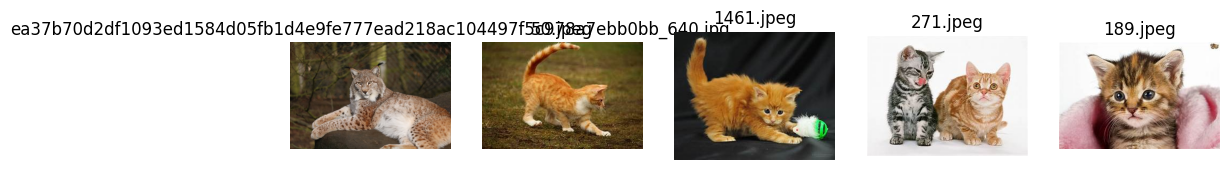

In [19]:
def show_random_images(folder, num_images=5):
    images = random.sample(os.listdir(folder), num_images)
    
    plt.figure(figsize=(12, 6))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name)
    
    plt.show()

# Display random images
show_random_images(image_folder)

# Expected Output: A row of randomly selected images from the dataset.

# **6️⃣ Visualize Image Label Distribution**


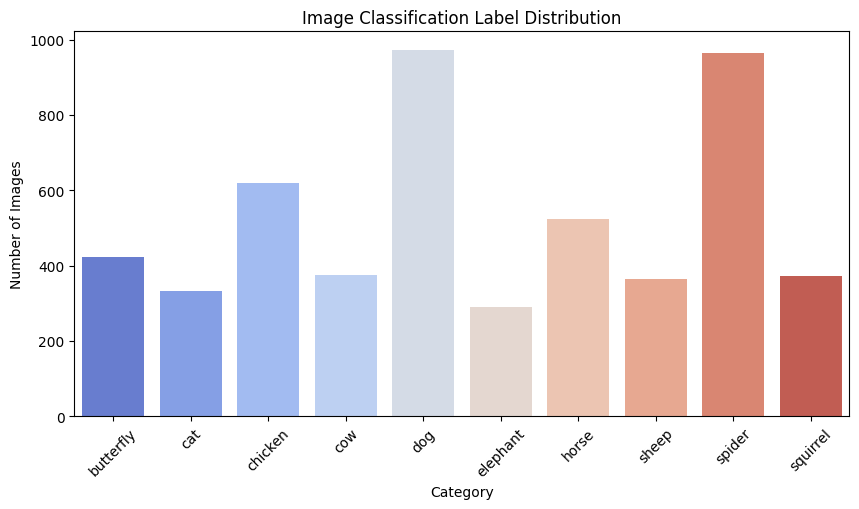

📊 Category Counts: {'butterfly': 423, 'cat': 334, 'chicken': 620, 'cow': 374, 'dog': 973, 'elephant': 290, 'horse': 525, 'sheep': 364, 'spider': 965, 'squirrel': 373}


In [22]:
# ✅ Define dataset path (train or val)
dataset_root = "data/val"  

# ✅ Ensure the dataset path exists
if not os.path.exists(dataset_root):
    print(f"❌ Error: Dataset folder '{dataset_root}' not found.")
else:
    # ✅ Get category names (only directories inside dataset_root)
    categories = [d for d in os.listdir(dataset_root) if os.path.isdir(os.path.join(dataset_root, d))]

    # ✅ Count number of images per category
    category_counts = {category: len(os.listdir(os.path.join(dataset_root, category))) for category in categories}

    # ✅ Convert to DataFrame for Seaborn compatibility
    import pandas as pd
    category_df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Count"])

    # ✅ Plot using Seaborn
    plt.figure(figsize=(10, 5))
    sns.barplot(data=category_df, x="Category", y="Count", hue="Category", dodge=False, legend=False, palette="coolwarm")
    plt.xlabel("Category")
    plt.ylabel("Number of Images")
    plt.title("Image Classification Label Distribution")
    plt.xticks(rotation=45)
    plt.show()

    # ✅ Print category counts
    print("📊 Category Counts:", category_counts)
